In [24]:
import numpy as np
import matplotlib.pyplot as plt

import lattice

# Single lattice demo
We have some transmission line with
$$ Z_0 = 50 [Ohm]$$

and a time delay of
$$ TD = 250 [ps] $$

The driver has a resistance of
$$ r_s = 25 [Ohm] $$

and a swing of
$$ v_s = 0 \rightarrow 2 V$$

We denote the driver side af near end and termination side as far end.

In [25]:
z0 = 50
td = 250*1e-12  # [s]

r_s = 25  # [Ohm] meaning it's overdriven, which results in a nice and clear 'ringing' effect
v_s = 2  # [V]

To run a lattice diagram we need
$$ \rho_{source} = \frac{Z_s - Z_0}{Z_s + Z_0}, \ \ \rho_{termination} = \frac{Z_t - Z_0}{Z_t + Z_0}  $$

The reflections are calculated as
$$ x_n = x_{n-1}*\left[\rho_{source}\cdot\delta (n\%2) + \rho_{termination}\cdot\delta ((n+1)\%2)\right], \ \ x_0 = V_{initial} $$
Where $\delta (k)$ is the Kronecker delta function, and $\%2$ is the modulus of 2.

Then the voltage levels become
$$ X_k = X_{k-1} + x_{1+2(k-1)} + x_{2+2(k-1)}, \ \ X_0 = x_0 $$
and
$$ X'_k = X'_{k-1} + x_{2+2(k-1)} + x_{3+2(k-1)}, \ \ X'_0 = x_0 + x_1, $$

where $X_k$ are the different source and $X'_k$ the different load voltage levels.


We will consider three case:
- open circuit
- shorted circuit
- terminated

In [26]:
ts_open, v_ne_open, v_fe_open = lattice.run_diagram(v_source=v_s, time_delay=td, line_impedance=z0, r_source=r_s, r_termination=np.inf,
                                     print_steady_state=True, print_initial_voltage=True, print_reflection_coeffs=True)

Reflection coefficients:
	(rho_near, rho_far) = (-0.3333, 1).
Steady state voltages:
	v_steady = 2 [V]
Initial voltages:
	v_initial = 1.3333 [V]


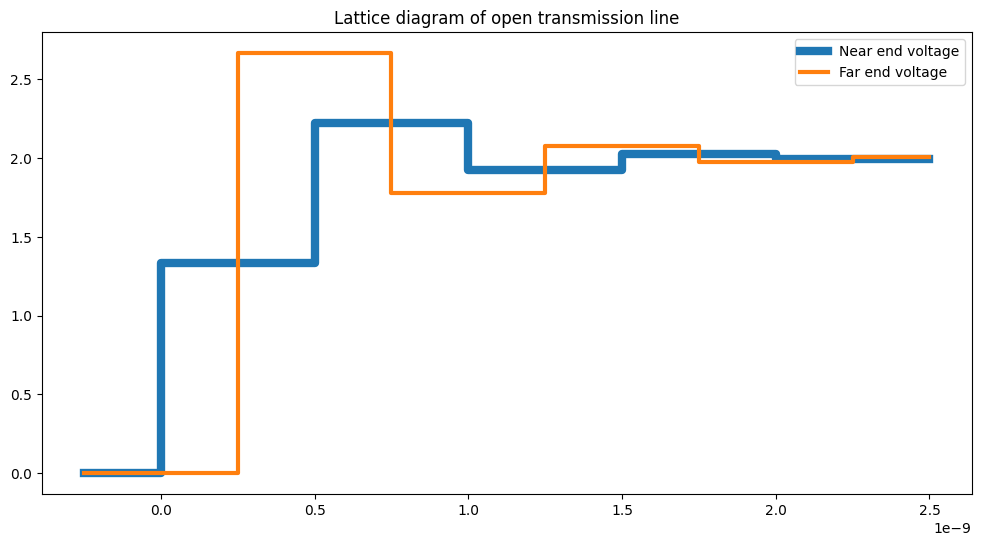

In [27]:
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.set_title('Lattice diagram of open transmission line')
ax.plot(ts_open, v_ne_open, label='Near end voltage', linewidth=6)
ax.plot(ts_open, v_fe_open, label='Far end voltage', linewidth=3)
ax.legend()

plt.legend()
plt.show()

When the line impedance is greater than the source impedance, the reflection coefficient
looking into the source will be negative, which will produce a "ringing" effect.

In [28]:
ts_short, v_ne_short, v_fe_short = lattice.run_diagram(v_source=v_s, time_delay=td, line_impedance=z0, r_source=r_s, r_termination=0,
                                     print_steady_state=True, print_initial_voltage=True, print_reflection_coeffs=True)

Reflection coefficients:
	(rho_near, rho_far) = (-0.3333, -1).
Steady state voltages:
	v_steady = 0 [V]
Initial voltages:
	v_initial = 1.3333 [V]


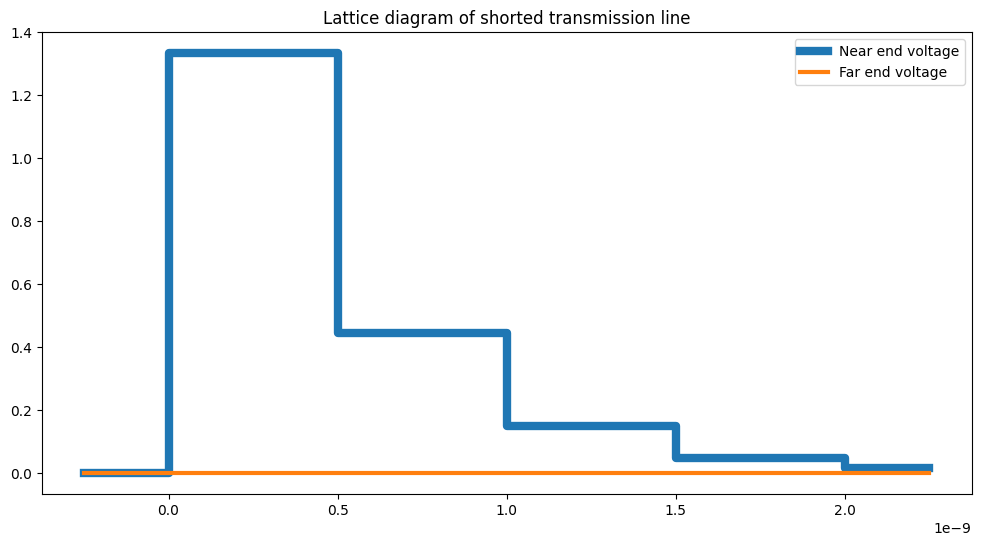

In [29]:
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.set_title('Lattice diagram of shorted transmission line')
ax.plot(ts_short, v_ne_short, label='Near end voltage', linewidth=6)
ax.plot(ts_short, v_fe_short, label='Far end voltage', linewidth=3)
ax.legend()

plt.legend()
plt.show()

In [30]:
ts, v_ne, v_fe = lattice.run_diagram(v_source=v_s, time_delay=td, line_impedance=z0, r_source=r_s, r_termination=50,
                                     print_steady_state=True, print_initial_voltage=True, print_reflection_coeffs=True)

Reflection coefficients:
	(rho_near, rho_far) = (-0.3333, 0.0).
Steady state voltages:
	v_steady = 1.3333 [V]
Initial voltages:
	v_initial = 1.3333 [V]


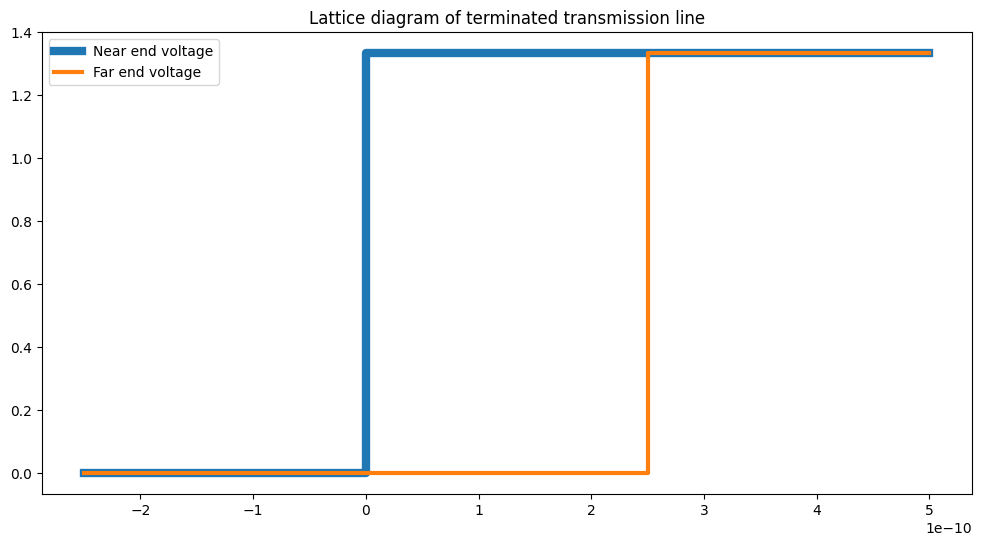

In [31]:
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.set_title('Lattice diagram of terminated transmission line')
ax.plot(ts, v_ne, label='Near end voltage', linewidth=6)
ax.plot(ts, v_fe, label='Far end voltage', linewidth=3)
ax.legend()

plt.legend()
plt.show()